# Выбор локации для скважины

Для добывающей компаниии нужно определить наиболее прибыльный регион для разведки и добычи нефти. Предоставлены данные о пробах нефти в трех регионах, где измерены качество нефти и объем ее запасов. Цель - построить модель машинного обучения, которая поможет принять решение о выборе региона с наибольшей ожидаемой прибылью. В анализе используется техника Bootstrap для оценки возможной прибыли и рисков.

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

warnings.filterwarnings("ignore")

In [2]:
BUDGET = 10e9
PRISE = 45e4
NUMBER_OF_OIL_RIGS = 200
NUMBER_OF_OIL_RIGS_SELECT = 500

In [3]:
try:
    geo_data_0 = pd.read_csv()

except:
    geo_data_0 = pd.read_csv()
    
try:
    geo_data_1 = pd.read_csv()

except:
    geo_data_1 = pd.read_csv()
    
try:
    geo_data_2 = pd.read_csv()

except:
    geo_data_2 = pd.read_csv()

In [4]:
display(geo_data_0.info())
display(geo_data_1.info())
display(geo_data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [5]:
display(geo_data_0.head(3))
display(geo_data_1.head(3))
display(geo_data_2.head(3))

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910


In [6]:
display(geo_data_0.isna().sum())
display(geo_data_1.isna().sum())
display(geo_data_2.isna().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [7]:
display(geo_data_0.duplicated().sum())
display(geo_data_1.duplicated().sum())
display(geo_data_2.duplicated().sum())

0

0

0

In [8]:
display(geo_data_0.describe(include='all'))
display(geo_data_1.describe(include='all'))
geo_data_2.describe(include='all')

,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99990,NaN,NaN,NaN,NaN
top,74z30,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,0.500419,0.250143,2.502647,92.500000
std,NaN,0.871832,0.504433,3.248248,44.288691
min,NaN,-1.408605,-0.848218,-12.088328,0.000000
25%,NaN,-0.072580,-0.200881,0.287748,56.497507
50%,NaN,0.502360,0.250252,2.515969,91.849972
75%,NaN,1.073581,0.700646,4.715088,128.564089


,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99996,NaN,NaN,NaN,NaN
top,LHZR0,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,1.141296,-4.796579,2.494541,68.825000
std,NaN,8.965932,5.119872,1.703572,45.944423
min,NaN,-31.609576,-26.358598,-0.018144,0.000000
25%,NaN,-6.298551,-8.267985,1.000021,26.953261
50%,NaN,1.153055,-4.813172,2.011479,57.085625
75%,NaN,8.621015,-1.332816,3.999904,107.813044


,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99996,NaN,NaN,NaN,NaN
top,Vcm5J,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,0.002023,-0.002081,2.495128,95.000000
std,NaN,1.732045,1.730417,3.473445,44.749921
min,NaN,-8.760004,-7.084020,-11.970335,0.000000
25%,NaN,-1.162288,-1.174820,0.130359,59.450441
50%,NaN,0.009424,-0.009482,2.484236,94.925613
75%,NaN,1.158535,1.163678,4.858794,130.595027


In [9]:
#Для одного id разные показатели, поэтому возникает вопрос о корректности данных. Удалим ненадежные данные с дублирующимся названием id, т.к. по условиям задачи значение id должно быть уникально
geo_data_0 = geo_data_0[~geo_data_0['id'].isin(geo_data_0[geo_data_0['id'].duplicated()]['id'].to_list())]
geo_data_1 = geo_data_1[~geo_data_1['id'].isin(geo_data_1[geo_data_1['id'].duplicated()]['id'].to_list())]
geo_data_2 = geo_data_2[~geo_data_2['id'].isin(geo_data_2[geo_data_2['id'].duplicated()]['id'].to_list())]

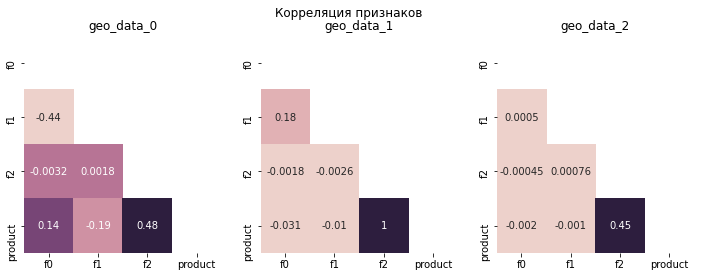

In [10]:
plt.rcParams['figure.figsize'] = (12,4)
# верхний треугольник корреляционной матриццы
matrix = np.triu(geo_data_0.corr())
fig, ax = plt.subplots(1,3)
sns.heatmap(geo_data_0.corr(), annot = True, cmap = sns.cubehelix_palette(8), cbar=False, mask=matrix, ax=ax[0]) 
sns.heatmap(geo_data_1.corr(), annot = True, cmap = sns.cubehelix_palette(8), cbar=False, mask=matrix, ax=ax[1])
sns.heatmap(geo_data_2.corr(), annot = True, cmap = sns.cubehelix_palette(8), cbar=False, mask=matrix, ax=ax[2])
ax[0].set_title('geo_data_0'), ax[1].set_title('geo_data_1'), ax[2].set_title('geo_data_2')
plt.suptitle ('Корреляция признаков')
fig.show()

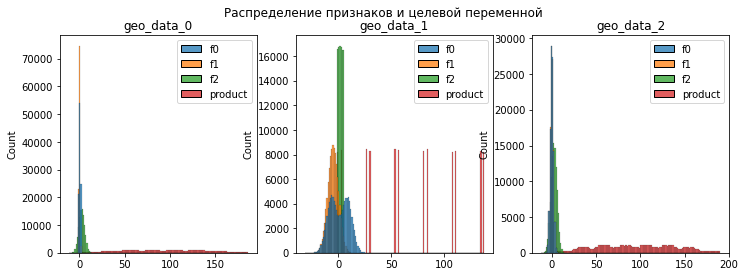

In [11]:
plt.rcParams['figure.figsize'] = (12,4)
fig, ax = plt.subplots(1,3)
sns.histplot(geo_data_0,  bins = 150, ax=ax[0])
sns.histplot(geo_data_1,  bins = 150, ax=ax[1])
sns.histplot(geo_data_2,  bins = 150, ax=ax[2])
ax[0].set_title('geo_data_0'), ax[1].set_title('geo_data_1'), ax[2].set_title('geo_data_2')
plt.suptitle ('Распределение признаков и целевой переменной')
fig.show()

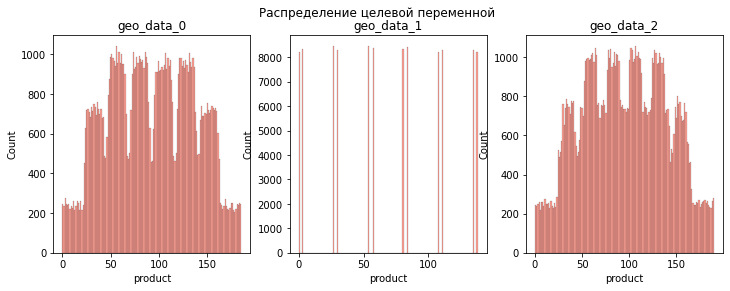

In [12]:
plt.rcParams['figure.figsize'] = (12,4)
fig, ax = plt.subplots(1,3)
sns.histplot(geo_data_0['product'],  bins = 150, color='salmon', ax=ax[0])
sns.histplot(geo_data_1['product'],  bins = 150, color='salmon', ax=ax[1])
sns.histplot(geo_data_2['product'],  bins = 150, color='salmon', ax=ax[2])
ax[0].set_title('geo_data_0'), ax[1].set_title('geo_data_1'), ax[2].set_title('geo_data_2')
plt.suptitle ('Распределение целевой переменной')
fig.show()

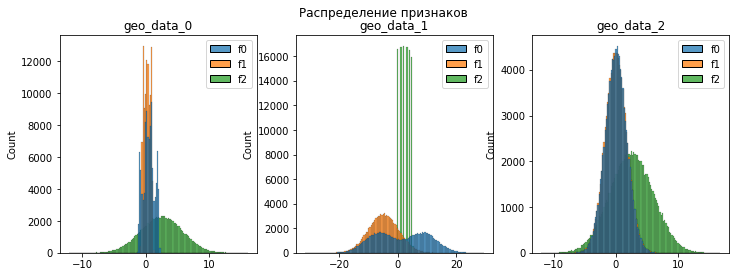

In [13]:
plt.rcParams['figure.figsize'] = (12,4)
fig, ax = plt.subplots(1,3)
sns.histplot(geo_data_0.loc[:, geo_data_0.columns!='product'],  bins = 150, ax=ax[0])
sns.histplot(geo_data_1.loc[:, geo_data_1.columns!='product'],  bins = 150, ax=ax[1])
sns.histplot(geo_data_2.loc[:, geo_data_2.columns!='product'],  bins = 150, ax=ax[2])
ax[0].set_title('geo_data_0'), ax[1].set_title('geo_data_1'), ax[2].set_title('geo_data_2')
plt.suptitle ('Распределение признаков')
fig.show()

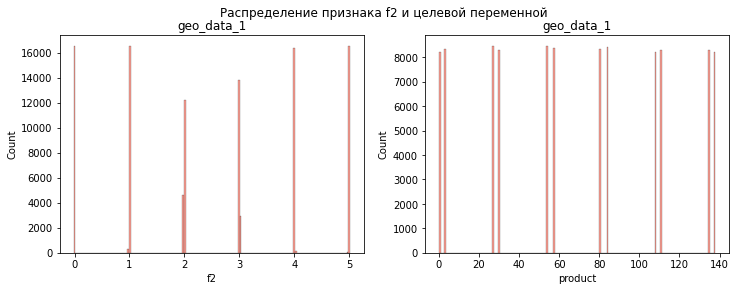

In [14]:
plt.rcParams['figure.figsize'] = (12,4)
fig, ax = plt.subplots(1,2)
sns.histplot(geo_data_1['f2'],  bins = 150, color='salmon', ax=ax[0])
sns.histplot(geo_data_1['product'], color='salmon', bins = 150, ax=ax[1])
ax[0].set_title('geo_data_1'), ax[1].set_title('geo_data_1')
plt.suptitle ('Распределение признака f2 и целевой переменной')
fig.show()

In [15]:
display(geo_data_1['f2'].duplicated().sum())
display(geo_data_1['product'].duplicated().sum())

0

99980

Целевая переменная в регионе geo_data_1 имеет дискретное распределение, в отличие от других регионов. Значения её дублируются в 99,98% случаев. Я бы посоветовал перепроверить данные.

In [33]:
df= pd.DataFrame({'t' : np.arange(1, 11, 1),
                 'p' : np.arange(2, 12, 1)
                 })
df

,t,p
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6
5,6,7
6,7,8
7,8,9
8,9,10
9,10,11


In [35]:
df2= pd.DataFrame({'t' : [8,9,1,5,6,10,2,4,7,3],
                 'p' : np.arange(2, 12, 1)
                 })
df2

,t,p
0,8,2
1,9,3
2,1,4
3,5,5
4,6,6
5,10,7
6,2,8
7,4,9
8,7,10
9,3,11


In [38]:
df.corr()

,t,p
t,1.0,1.0
p,1.0,1.0


In [39]:
df2.corr()

,t,p
t,1.00000,-0.29697
p,-0.29697,1.00000


In [16]:
# Избавимся от ненужного столбца id
geo_data_0 = geo_data_0.drop(['id'], axis=1)
geo_data_1 = geo_data_1.drop(['id'], axis=1)
geo_data_2 = geo_data_2.drop(['id'], axis=1)

#### Вывод:
В начальных данных присутствовало 4 количественных признака и один категориальный.  
Удален столбец id, который представлял из себя уникальный id скважины, он не давал полезной информации для обучения модели.  
Были удалены данные с одинаковыми id. Возможно, данные не корректны, значение id должно быть уникально.     
В регионе geo_data_1 признак 'f2' имеет высокий коэффициент корреляции с целевой переменной, равный единице. Это говорит о сильной прямой линейной зависимости.     
В других двух регионах этот признак имеет средний коэффициент корреляции с целевой переменной.  
Целевая переменная в регионе geo_data_1 имеет дискретное распределение, в отличие от других регионов. Значения её дублируются в 99,98% случаев. Я бы посоветовал перепроверить данные.

Посмотрим, как это скажется на прогнозах модели. Скорее всего, для региона geo_data_1 мы получим более точные предсказания.

## Обучение и проверка модели

Обучим и проверим модель для каждого региона:
2.1. Разобьем данные на обучающую и валидационную выборки в соотношении 75:25.      
2.2. Обучим модель и сделаем предсказания на валидационной выборке.     
2.3. Сохраним предсказания и правильные ответы на валидационной выборке.        
2.4. Напечатаем на экране средний запас предсказанного сырья и RMSE модели.     
2.5. Проанализируем результаты.     

In [17]:
# Функция возврата имени переменной
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

In [18]:
# Функция расчета среднего запаса сырья и RMSE
def mean_rmse_geo_data (geo_data):    
    train_geo_data, test_geo_data = train_test_split(geo_data, test_size=0.25, random_state=12345)
    # Разделение на выборки
    features_train_geo_data = train_geo_data.drop(['product'], axis=1)
    target_train_geo_data = train_geo_data['product']
    features_test_geo_data = test_geo_data.drop(['product'], axis=1)
    target_test_geo_data = test_geo_data['product']
    # Масштабирование признаков
    num_features = ['f0','f1','f2']
    scaler = MinMaxScaler()
    features_train_geo_data[num_features] = scaler.fit_transform(features_train_geo_data[num_features])
    features_test_geo_data[num_features] = scaler.transform(features_test_geo_data[num_features])
    # Обучение модели
    model = LinearRegression()
    model.fit(features_train_geo_data, target_train_geo_data)
    # Получение результатов
    predicted_valid = model.predict(features_test_geo_data)
    mse = mean_squared_error(target_test_geo_data, predicted_valid)
    print('features_train.shape =', features_train_geo_data.shape,'|', 'target_train.shape =', target_train_geo_data.shape)
    print('features_test.shape =', features_test_geo_data.shape,' |', 'target_test.shape =', target_test_geo_data.shape)
    print('-' * 70)
    print(f'Средний запас предсказанного сырья для {namestr(geo_data,globals())[0]}:', predicted_valid.mean())
    print('RMSE =', mse ** 0.5)
    predicted_target_geo_data = features_test_geo_data
    predicted_target_geo_data['predict'] = predicted_valid
    predicted_target_geo_data['target'] = target_test_geo_data
    predicted_target_geo_data = predicted_target_geo_data.drop(['f0','f1','f2'], axis=1)
    return [predicted_target_geo_data, mse ** 0.5]

In [19]:
predicted_target_geo_data_0, mean_rmse_geo_data_0 = mean_rmse_geo_data(geo_data_0)

features_train.shape = (74985, 3) | target_train.shape = (74985,)
features_test.shape = (24995, 3)  | target_test.shape = (24995,)
----------------------------------------------------------------------
Средний запас предсказанного сырья для geo_data_0: 92.42384109947358
RMSE = 37.716904960382735


In [20]:
predicted_target_geo_data_1, mean_rmse_geo_data_1 = mean_rmse_geo_data(geo_data_1)

features_train.shape = (74994, 3) | target_train.shape = (74994,)
features_test.shape = (24998, 3)  | target_test.shape = (24998,)
----------------------------------------------------------------------
Средний запас предсказанного сырья для geo_data_1: 68.98311857983123
RMSE = 0.891490139034854


In [21]:
predicted_target_geo_data_2, mean_rmse_geo_data_2 = mean_rmse_geo_data(geo_data_2)

features_train.shape = (74994, 3) | target_train.shape = (74994,)
features_test.shape = (24998, 3)  | target_test.shape = (24998,)
----------------------------------------------------------------------
Средний запас предсказанного сырья для geo_data_2: 95.11622302076478
RMSE = 39.975543264382345


In [22]:
predicted_target_geo_data_0.head(3)

,predict,target
6169,62.286613,61.171722
29916,70.428178,94.192535
49569,87.349562,137.742601


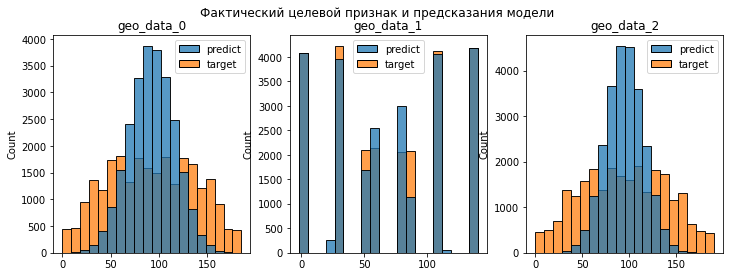

In [23]:
fig, ax = plt.subplots(1,3)
sns.histplot(predicted_target_geo_data_0,  bins = 20, ax=ax[0])
sns.histplot(predicted_target_geo_data_1,  bins = 20, ax=ax[1])
sns.histplot(predicted_target_geo_data_2,  bins = 20, ax=ax[2])
ax[0].set_title('geo_data_0'), ax[1].set_title('geo_data_1'), ax[2].set_title('geo_data_2')
plt.suptitle ('Фактический целевой признак и предсказания модели')
fig.show()

#### Вывод:
Самые точные предсказания мы получили для региона geo_data_1, скорее всего это связано с очень сильной корреляцией одного из признаков с таргетом. RMSE для этого региона = 0.9 тыс. баррелей. Средний запас предсказанного сырья для каждой точки в geo_data_1 составляет 69 тыс. баррелей, что меньше чем в других регионах.    
Для регионов geo_data_1 и geo_data_1 среднеквадратическая ошибка составила 37.7 и 40 тыс. барелей, а запас предсказанного сырья для каждой точки 92,4 и 95,1 тыс. баррелей соответственно.

## Подготовка к расчёту прибыли

Подготовьтесь к расчёту прибыли:    
 3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.  
 3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.  
 3.3. Напишите выводы по этапу подготовки расчёта прибыли.  

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.    
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.    
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.     

In [24]:
# Объём сырья для безубыточной разработки новой скважины
volume_0_profit = BUDGET / (PRISE * NUMBER_OF_OIL_RIGS)
print('Достаточный объём сырья для безубыточной разработки новой скважины =', volume_0_profit)

Достаточный объём сырья для безубыточной разработки новой скважины = 111.11111111111111


In [25]:
# Создадим функцию для сравнения среднего запаса предсказанного сырья и достаточного объема
def cap_obvious(predicted_volume):
    if volume_0_profit>predicted_volume['predict'].mean():
        print(f'Средний запас предсказанного сырья для {namestr(predicted_volume,globals())[0]} менше достаточного объема на {np.round(abs(volume_0_profit-predicted_volume.mean())[0], 2)} тыс. барелей')
    elif volume_0_profit==predicted_volume:
        print(f'Средний запас предсказанного сырья для {namestr(predicted_volume,globals())[0]} равен достаточному объему {np.round(volume_0_profit, 2)[0]} тыс. барелей')
    else:
        print(f'Средний запас предсказанного сырья для {namestr(predicted_volume,globals())[0]} больше достаточного объема на {np.round(abs(volume_0_profit-predicted_volume.mean())[0], 2)} тыс. барелей')

In [26]:
cap_obvious(predicted_target_geo_data_0)
cap_obvious(predicted_target_geo_data_1)
cap_obvious(predicted_target_geo_data_2)

Средний запас предсказанного сырья для predicted_target_geo_data_0 менше достаточного объема на 18.69 тыс. барелей
Средний запас предсказанного сырья для predicted_target_geo_data_1 менше достаточного объема на 42.13 тыс. барелей
Средний запас предсказанного сырья для predicted_target_geo_data_2 менше достаточного объема на 15.99 тыс. барелей


#### Вывод:     
Средний запас предсказанного сырья во всех трех регионах меньше достаточного объема

## Расчёт прибыли и рисков 

Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:     
 4.1. Выберите скважины с максимальными значениями предсказаний.    
 4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.  
 4.3. Рассчитайте прибыль для полученного объёма сырья. 

In [27]:
def profit(predicted_target_geo_data):
    predicted_target_geo_data = predicted_target_geo_data.sort_values(by='predict', ascending=False)
    profit_region = (predicted_target_geo_data['target'][:NUMBER_OF_OIL_RIGS].sum() * PRISE) - BUDGET
    print(f'Прибыль для региона {np.round(profit_region/1000000000, 3)} миллиарда рублей')
    return profit_region

In [28]:
profit_geo_data_0 = profit(predicted_target_geo_data_0)
profit_geo_data_1 = profit(predicted_target_geo_data_1)
profit_geo_data_2 = profit(predicted_target_geo_data_2)

Прибыль для региона 3.136 миллиарда рублей
Прибыль для региона 2.415 миллиарда рублей
Прибыль для региона 2.466 миллиарда рублей


Посчитайте риски и прибыль для каждого региона:     
 5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.    
 5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.     
 5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.  

In [29]:
predicted_target_geo_data_0.head(3)

,predict,target
6169,62.286613,61.171722
29916,70.428178,94.192535
49569,87.349562,137.742601


In [30]:
def revenue(target, predict, count):
    probs_sorted = predict.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return PRISE * selected.sum() - BUDGET

In [31]:
state = np.random.RandomState(12345)
def lower_upper_loss(predicted_target_geo_data):
    values = []
    target_geo_data = predicted_target_geo_data['target']
    predict_geo_data = predicted_target_geo_data['predict']
    for i in range(1000):
        target_subsample = target_geo_data.sample(n=NUMBER_OF_OIL_RIGS_SELECT, replace=True, random_state=state)
        predict_subsample = predict_geo_data[target_subsample.index]
        values.append(revenue(target_subsample, predict_subsample, NUMBER_OF_OIL_RIGS))
        
    values = pd.Series(values)
    loss = values[values<0].count() / len(values)
    lower = values.quantile(0.025)
    upper =  values.quantile(0.975)
    mean = values.mean()

    print('2,5%-квантиль:', lower)
    print('Средняя прибыль:', mean)
    print('97,5%-квантиль:',upper)
    print('Вероятность убытка: {:.1%}'.format(loss))

In [32]:
state = np.random.RandomState(12345)
print('-' * 35)
print('geo_data_0:')
lower_upper_loss(predicted_target_geo_data_0)
print('-' * 35)
print('geo_data_1:')
lower_upper_loss(predicted_target_geo_data_1)
print('-' * 35)
print('geo_data_2:')
lower_upper_loss(predicted_target_geo_data_2)
print('-' * 35)

-----------------------------------
geo_data_0:
2,5%-квантиль: -90234067.10362324
Средняя прибыль: 459085613.4113576
97,5%-квантиль: 987953883.1101811
Вероятность убытка: 4.7%
-----------------------------------
geo_data_1:
2,5%-квантиль: 133791191.22885112
Средняя прибыль: 523579383.22678614
97,5%-квантиль: 961450161.0437706
Вероятность убытка: 0.6%
-----------------------------------
geo_data_2:
2,5%-квантиль: -198355934.11350116
Средняя прибыль: 341472005.26126266
97,5%-квантиль: 852708580.7650117
Вероятность убытка: 11.6%
-----------------------------------


#### Вывод:
Единственный регион, в котором вероятность убытка меньше 2,5%, это регион geo_data_1.       
Для разработки месторождения подходит только регион geo_data_1, так как риск получить убыток менее одного процента.     
Однако, следует отметить, что целевая переменная в регионе geo_data_1 имеет дискретное распределение, в отличие от других регионов. Значения её дублируются в 99,98% случаев. Рекомендую проверить эти данные для исключения возможных проблем.